### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Missing data and its imputation](#section401)<br/>
    - 4.2 [Removing Unsed data](#section402)<br/>
    - 4.3 [Working on Dubication/correct mapping of data](#section403)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [toss_winner vs Match winner](#section501)<br/>
    - 5.2 [Winner on the basis of toss_decision](#section502)<br/>
    - 5.3 [winner vs toss_decision vs toss_winner](#section503)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [Check which team has performed well compared with others and on what factors?](#section601)<br/>
         - 6.1.1 [Which team has won the maximum matches?](#section602)<br/>
         - 6.1.2 [Which team has played how many matches and how much they won out of it?](#section603)<br/>
         - 6.1.3 [How many matches teams have played and out of which how many they won or loss?](#section604)<br/>
         - 6.1.4 [Explore season wise performance of Mumbai Indians?](#section605)<br/>
         - 6.1.5 [Check which player has performed well in all seasons and won maximum Player of the match title?](#section606)<br/>
         - 6.1.6 [What are the chances of winning the match when Mumbai Indians have won the toss.?](#section607)<br/>
         - 6.1.7 [What contributes to winning for Mumbai Indians, fielding or batting?](#section608)<br/>
         - 6.1.8 [Do Mumbai Indians has a Home advantage or not?](#section609)<br/>
- 7. [Conclusion](#section7)<br/>

<img src='C:/xampp/htdocs/practice/Data%20Science/Term1-2-project/images/cover-pic.jpg' align='center' /><br/>
<a id=section1></a> 
This is the ***Indian Premier League (IPL)*** dataset of the 10 years (from 2008 to 2018). <br/>
```Being Advertising company, want to sponser a team and its palyer(s) for launching new enegry drink, so as per stats ,which Team can curate more profit for this product in upcoming season```

<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "Matches"
- __Sponsoring Organization__: Insiad
- __Year__: 2008 to 2018
- __Description__: "This dataset has all the matches record in the season from 2008 to 2018 under the title of ***Indian Premier League aka IPL***. 

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

***season*** - Year in which match was played. <br/>
***city*** - City in which that match was played.<br/>
***date*** - Occurence Date<br/>
***team1*** - Name of the Team 1 who participated in that match<br/>
***team2*** - Name of the Team 2 who participated in that match<br/>
***toss_winner*** - Team who won the toss<br/>
***toss_decision*** - Team who won the toss what they choose ball or field<br/>
***result*** - Who won the match<br/>
***dl_applied*** - Does duckworth lewis method was used to decide the winner?<br/>
***win_by_runs*** - By how many runs team has won the match but 0 means team won by wicket(s).<br/>
***win_by_wickets*** - By how many wickets team has won the match but 0 means team won by run(s).<br/>
***player_of_match*** - Name of the player Who won player of the match.<br/>
***venue*** - Stadium where the match was played.<br/>
***umpire1, umpire2, umpire3*** - Name of the upmire under whose match was conducted.<br/>


<a id=section2></a> 
### 2. Load the packages and data 

In [3]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

ipl = pd.read_csv(r'C:\xampp\htdocs\practice\Data Science\Project\Term-1\matches.csv')                       # Load in the dataset as mh

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [4]:
ipl.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [5]:
ipl.head()               # Display the first five rows of the data set

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
ipl.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,NaN,Mumbai,2014-05-14,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


#### Observations
As we can see the above dataset is well structured every column has proper value, doesn't seems anyone has outliers. The row name ***Top*** tells the maximum story of this dataset.

In [7]:
ipl.sample(10)                                                                  # Display a random 10 rows from the data set

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
608,609,2016,Delhi,2016-05-05,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,AM Rahane,Feroz Shah Kotla,C Shamshuddin,RJ Tucker,NaN
368,369,2012,Delhi,2012-05-15,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,bat,normal,0,Delhi Daredevils,0,5,UT Yadav,Feroz Shah Kotla,HDPK Dharmasena,BNJ Oxenford,NaN
324,325,2012,Kolkata,2012-04-15,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,2,0,SP Narine,Eden Gardens,Asad Rauf,S Asnani,NaN
629,630,2016,Kanpur,2016-05-21,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
586,587,2016,Bangalore,2016-04-17,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,Q de Kock,M Chinnaswamy Stadium,VA Kulkarni,A Nand Kishore,NaN
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
266,267,2011,Jaipur,2011-04-29,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,J Botha,Sawai Mansingh Stadium,Asad Rauf,SK Tarapore,NaN
218,219,2010,Jaipur,2010-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,37,0,SR Tendulkar,Sawai Mansingh Stadium,BR Doctrove,SK Tarapore,NaN
386,387,2013,Pune,2013-04-07,Pune Warriors,Kings XI Punjab,Pune Warriors,bat,normal,0,Kings XI Punjab,0,8,M Vohra,Subrata Roy Sahara Stadium,S Asnani,SJA Taufel,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


In [8]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
# profile = pandas_profiling.ProfileReport(ipl)

In [9]:
# profile.to_file("ipl_pre_profiling.html")                              # HTML file will be downloaded to your workspace

<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:
 - <em>Boolen</em>: Only 1 (dl_applied) 
 - <em>Number</em>: <strong>4</strong> (integer)
 - <em>Categorical</em>: Everything else
- <strong>city</strong> has 7 missing values that need to be addressed. 
- <strong>Umpire 3</strong>  also has 636 missing values moreover umpire fields are not going to contribute much so that we will drop it.
- In 2018 season maximum matches were played.
- Mumbai as a city hosted maximum matches but maximum matches were played in M Chinnaswamy Stadium (Bengaluru).
- Mumbai Indians played maximum matches and also leads in the winning table.
- We can remove Date column as it will add much value.

#### Check whether Team 1 and Team 2 has the same values?
So that team1 and team2 don't have the same value and affects the output

In [10]:
commonName = ipl[ipl['team1'] == ipl['team2']]
print(commonName.count())

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


<a id=section4></a> 
### 4. Data Normalization

<a id=section403></a>
### 4.1. Missing Data and its imputation

In [11]:
#missing data
total = ipl.isnull().sum().sort_values(ascending=False)
percent = ((ipl.isnull().sum()/ipl.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)
print(missing_data)

                 Total    Percent
umpire3            636  91.379310
city                 7   1.005747
player_of_match      3   0.431034
winner               3   0.431034
umpire1              1   0.143678
umpire2              1   0.143678
toss_winner          0   0.000000
season               0   0.000000
date                 0   0.000000
team1                0   0.000000
team2                0   0.000000
result               0   0.000000
toss_decision        0   0.000000
dl_applied           0   0.000000
win_by_runs          0   0.000000
win_by_wickets       0   0.000000
venue                0   0.000000
id                   0   0.000000


As we can see from the above table, there some missing values which we need to address to the correct output. But we will remove umpire columns as we are not going to use it, as it's not adding any value in our findings.
- Removing Upmire 1, 2 & 3 and date coulmn as well, as it doesn't add any value in our exploration.

In [12]:
ipl.drop(['date','umpire1','umpire2','umpire3'],axis=1)

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,7949,2018,Pune,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium
692,7950,2018,Mumbai,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium
693,7951,2018,Kolkata,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens
694,7952,2018,Kolkata,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens


- As we saw city column has missing data, which now we have to fix it
-- Check below the matches which were played at ***Dubai International Cricket Stadium*** has city as NaN, so now we will add city as ***Dubai***.

In [13]:
ipl[ipl['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [14]:
ipl['city'] = ipl['city'].fillna('Dubai') 

Now we will check the player of the match column, but as we can see there are 3 matches which have No result. So, now no changes/modifications are required for a player of match, and winner columns.

In [15]:
ipl[ipl['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


#### Checking duplication of teams name.
- The Rising Pune Supergiants has three different names (Pune Supergiants, Rising Pune Supergiants & Rising Pune Supergiant) so that we have to make uniform.
- By replacing Rising Pune Supergiants & Rising Pune Supergiant with Pune Supergiants.

In [16]:
ipl['team1'].value_counts()

Mumbai Indians                 91
Kings XI Punjab                84
Chennai Super Kings            83
Royal Challengers Bangalore    76
Kolkata Knight Riders          74
Delhi Daredevils               72
Rajasthan Royals               62
Sunrisers Hyderabad            55
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [17]:
ipl = ipl.replace(['Rising Pune Supergiants','Rising Pune Supergiant'],'Pune Warriors')

<a id=section5></a> 
## 5. Identifying pattern in data

<a id=section501></a>
### 5.1 toss_winner vs Match winner

Text(0.5, 1.0, 'Teams who won the toss vs winner of the match')

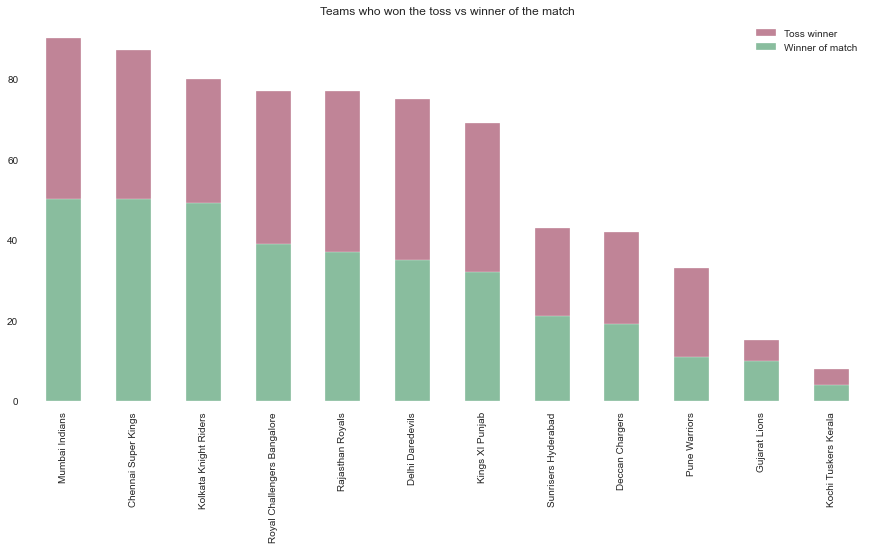

In [33]:
ipl['toss_winner'].value_counts().plot(kind='bar',stackhttp://localhost:8889/notebooks/Data%20science/Matches%20Project.ipynb#5.1-toss_winner-vs-Match-winnered=True, color='#c08497', figsize=(15,7))
ipl[ipl['toss_winner'] == ipl['winner']]['winner'].value_counts().plot(kind='bar',stacked=True,color='#89bd9e', figsize=(15,7))

plt.legend(labels=['Toss winner', 'Winner of match'])
plt.title('Teams who won the toss vs winner of the match')

***Observation***: The above chart clearly depicts that toss plays a very vital role in winning the match. If the team won the toss half battle is already conquered. As we can see, approx 50% times teams won when they won the toss.<br/>
Now, We will see toss decision graph as well in the below section. 

<a id=section502></a>
### 5.2 Winner on the basis of toss_decision

Text(0.5, 1.0, 'Team wise: Winners on the basis of Toss decision')

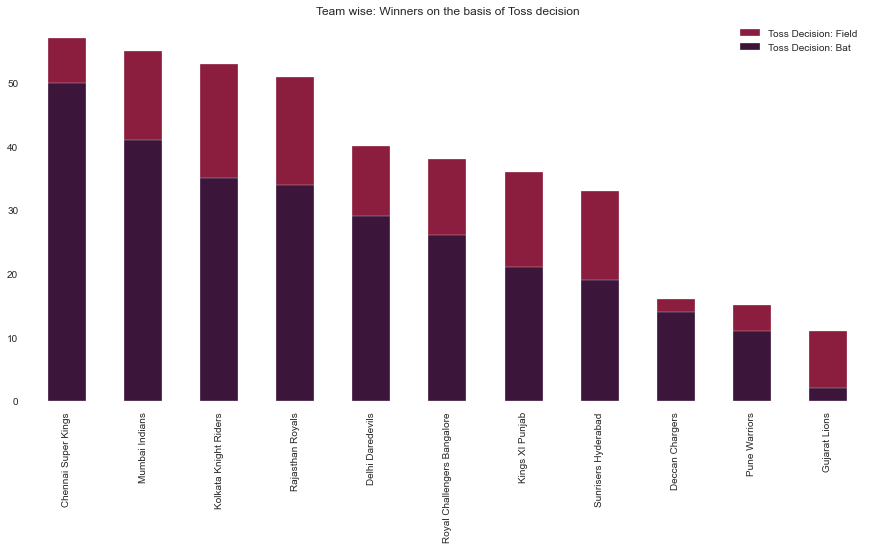

In [31]:
ipl[ipl['toss_decision'] == 'field']['winner'].value_counts().plot(kind='bar',stacked=True,color='#8b1e3f', figsize=(15,7))
ipl[ipl['toss_decision'] == 'bat']['winner'].value_counts().plot(kind='bar',stacked=True,color='#3c153b', figsize=(15,7))

plt.legend(labels=['Toss Decision: Field', 'Toss Decision: Bat'])
plt.title('Team wise: Winners on the basis of Toss decision')

***Observation***: The above charts show that there are more chances to win the match if team choose to field, as every team won maximum matches while doing fielding first.

<a id=section503></a>
### 5.3 Winner vs toss_winner vs toss_decision

Text(0.5, 1.0, 'Team wise: Number of matches won vs Toss winner vs Toss decision: Field/Bat')

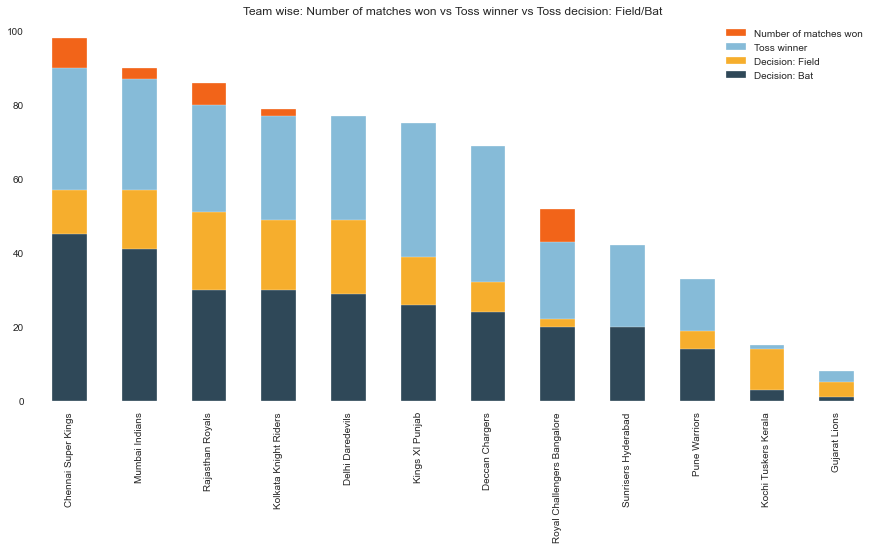

In [20]:
ipl['winner'].value_counts().plot(kind='bar',stacked=True,color='#f26419', figsize=(15,7))
ipl['toss_winner'].value_counts().plot(kind='bar',stacked=True,color='#86bbd8')
ipl[ipl['toss_decision'] == 'field']['toss_winner'].value_counts().plot(kind='bar',stacked=True,color='#f6ae2d')
ipl[ipl['toss_decision'] == 'bat']['toss_winner'].value_counts().plot(kind='bar',stacked=True,color='#2f4858')

plt.legend(labels=['Number of matches won', 'Toss winner', 'Decision: Field', 'Decision: Bat'])
plt.title('Team wise: Number of matches won vs Toss winner vs Toss decision: Field/Bat')

***Observation***: Trying to emphasize my point towards toss, and make it more clear that toss help teams to make their strategy and allow them to choose a field, as we saw an earlier team who fields first has maximum chances of a win.

<a id=section6></a> 
## 6. Analysis through questions

<a id=section6.1></a> 
### 6.1 Check which team has performed well compared with others and on what factors?
In this section, we will explore the data in a detailed way to find the best team on the basis of different scenarios.

<a id=section602></a> 
#### 6.1.1 Which team has won the maximum matches?

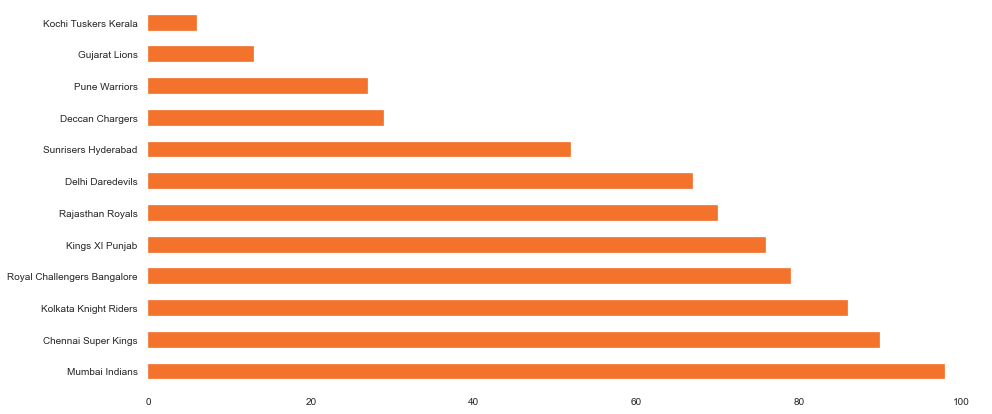

In [21]:
ipl['winner'].value_counts().plot(kind='barh', figsize=(15,7), color='#f3722c')

***Observation:*** From the above chart it's clear that ***Mumbai Indians*** have won the max matches followed by Chennai Super Kings.<br/><br/>
<a id=section603></a> 
#### 6.1.2 Which team has played how many matches and how much they won out of it?

Text(0.5, 1.0, 'Team wise: Number of matches played vs win')

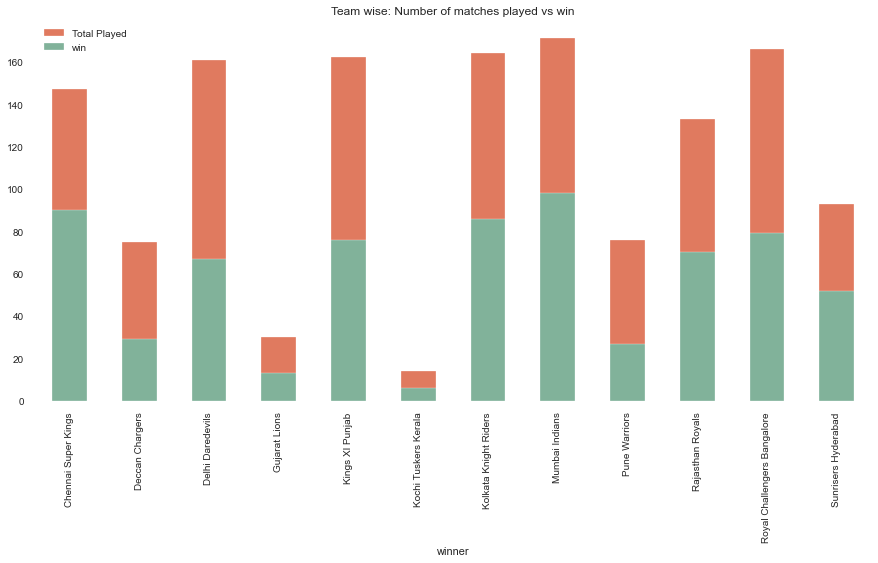

In [22]:
Total_match_palyed =ipl.groupby(['team1'])['season'].count() + ipl.groupby(['team2'])['season'].count()
Match_won = ipl.groupby('winner',sort=True)['season'].count()

Total_match_palyed.plot(kind='bar', figsize=(15,7), color='#e07a5f')
Match_won.plot(kind='bar', figsize=(15,7), color='#81b29a')

plt.legend(labels=['Total Played', 'win'])
plt.title('Team wise: Number of matches played vs win')

Mumbai Indians have a tough fight with Chennai super kings in the data table as well as in the fields. So, seeing the above graph can't confirm with which team we should go further. So, now we will add one more layer in the above graph, just to try to get some more clear picture of it.

<a id=section604></a> 
#### 6.1.3 How many matches teams have played and out of which how many they won or loss?

Text(0.5, 1.0, 'Total Number of matches played vs Win vs Loss')

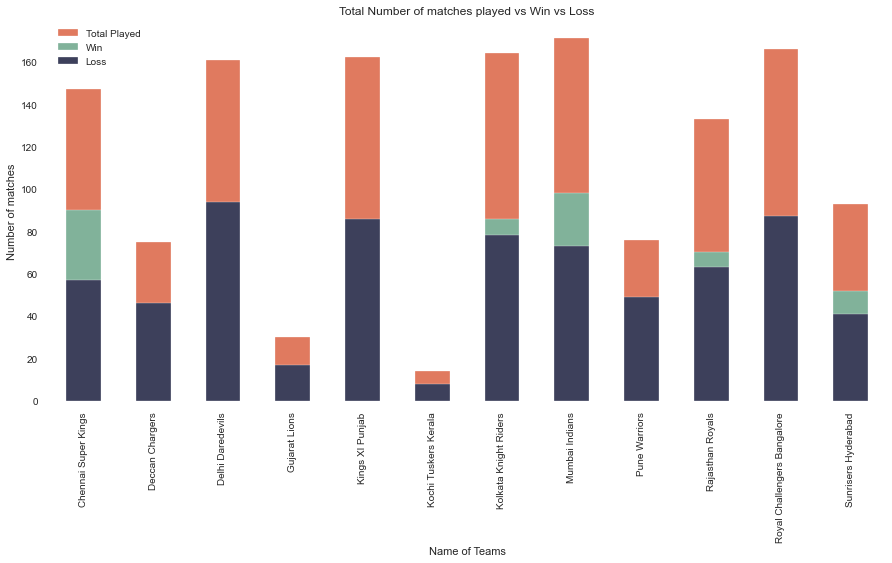

In [23]:
Match_lost = Total_match_palyed - Match_won

Total_match_palyed.plot(kind='bar', figsize=(15,7), color='#e07a5f')
Match_won.plot(kind='bar', figsize=(15,7), color='#81b29a')
Match_lost.plot(kind='bar', figsize=(15,7), color='#3d405b')

plt.ylabel('Number of matches')
plt.xlabel('Name of Teams')
plt.legend(labels=['Total Played', 'Win', 'Loss'])
plt.title('Total Number of matches played vs Win vs Loss')

***Observation:*** Mumbai Indians have played maximum matches comparing with other teams and also won the max matches, so now to confirm with which team we have to move forward and finalize that team for the next advertisement project, now we will check the season-wise performance of Mumbai Indians.<br/>
In season-wise graph performance of Mumbai Indians has improved.<br/>
<a id=section605></a> 
#### 6.1.4 Explore season wise performance of Mumbai Indians?

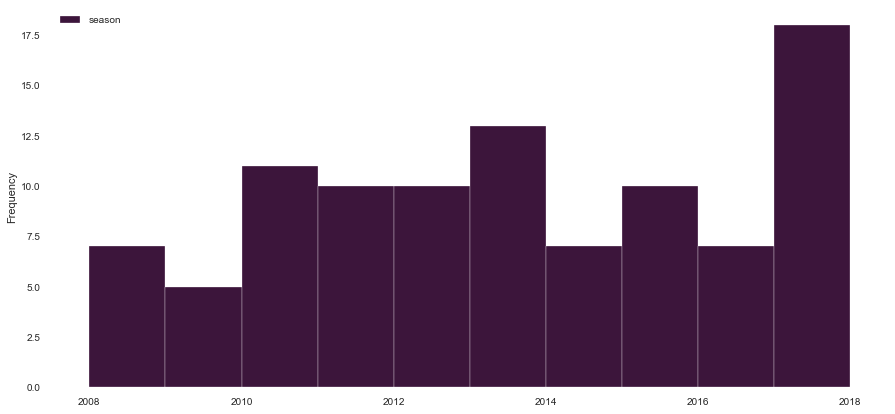

In [24]:
# Season wise performance 
ipl.loc[(ipl['winner'] == 'Mumbai Indians'),['season','winner']].plot(kind='hist',color='#3c153b', figsize=(15,7))

<a id=section606></a> 
#### 6.1.5 Check which player has performed well in all seasons and won maximum Player of the match title?

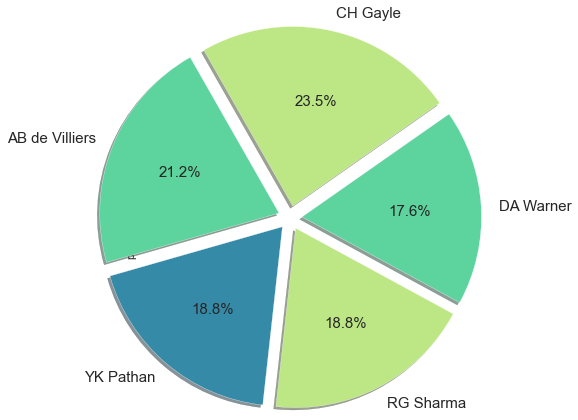

In [25]:
ipl['player_of_match'].value_counts().head(5).plot(kind='pie', radius=1.5 ,fontsize=15, explode=[0.1,0.1, 0.1, 0.1,0.1] ,autopct='%1.1f%%', startangle=35, shadow = True, colors=['#bce784','#5dd39e','#348aa7'])

***Observation:*** As per the above graph, the first two-position hold by Royal Challengers Bangalore players and third place is by Mumbai Indians, but in the winning graph, RCB lands at 4th position and MI at first.<br/><br/>
<a id=section607></a> 
#### 6.1.6 What are the chances of winning the match when Mumbai Indians have won the toss.?

The below graph will explain what are the chances of winning the match when Mumbai Indians have won the toss.
- It's very clear from the graph that tosses helps to create a strong foundation for any match.
- Even Mumbai Indians win in those scenarios as well when they lose the toss, but their chances get increased when they won the toss.

Text(0.5, 0, 'Chances of winning after winning the toss')

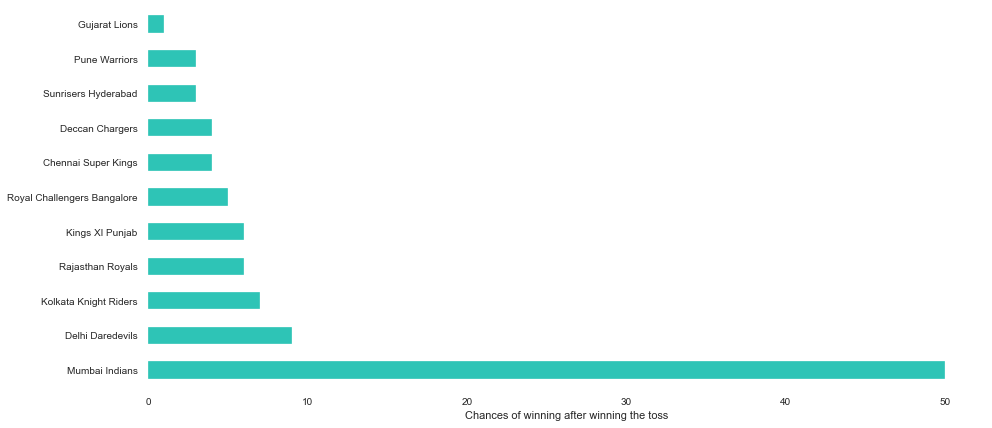

In [34]:
ipl[ipl['winner'] == 'Mumbai Indians']['toss_winner'].value_counts().plot(kind='barh',figsize=(15, 7), color='#2ec4b6')
plt.xlabel('Chances of winning after winning the toss')

<a id=section608></a> 
#### 6.1.7 What contributes to winning for Mumbai Indians, fielding or batting?
It's quite evident that whenever Mumbai Indians do fielding first there chances of winning is 58.2% times than doing batting first, which concluded two things, one is that their bowlers are so efficient that they don't give many runs or the batsmen played well and chase any target given by opponents.

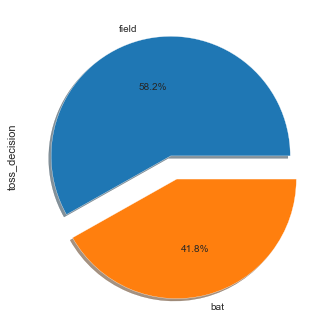

In [35]:
ipl[ipl['winner'] == 'Mumbai Indians']['toss_decision'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

<a id=section609></a> 
#### 6.1.8 Do Mumbai Indians has a Home advantage or not?
The anwser of this question will be more clear from below graph.

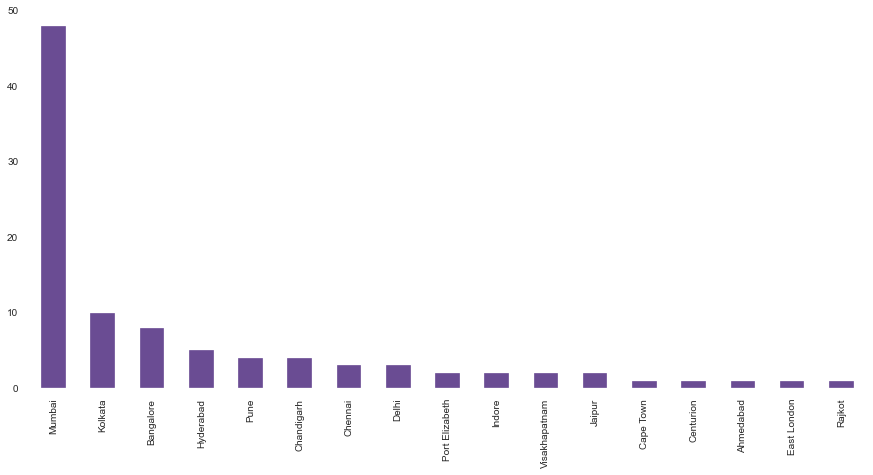

In [28]:
ipl[ipl['winner'] == 'Mumbai Indians']['city'].value_counts().plot(kind='bar', figsize=(15,7), color='#6a4c93')

<a id=section7></a> 
## 7. Conclusion

- There are 12 teams that are competing with each other, but some teams are added later in the time.
- The two teams Mumbai Indians and Chennai super kings, these teams always leads in every table.
- But in some cases, Mumbai Indians leads, so our consideration will be Mumbai Indians (MI) for the next future project.
- Being an advertising company, we always want our team or player always/maximum time to be on screen, and this scenario validated by MI because stats show they have played maximum matches till now.
- Now the face of a newly launching product can be the best fit for Rohit Sharma who is in the top 3 list of the players who won the maximum Player of the match title.
- Also, Rohit Sharma is the skipper of this team, so it will endorse this product properly.
- Considering KA Pollard and Harbajan Singh, to accompany Rohit Sharma for advertising this product, will boost the sale.
- As these two players are performers and also they are at the 2nd and 5th position of winning player of match title from MI.

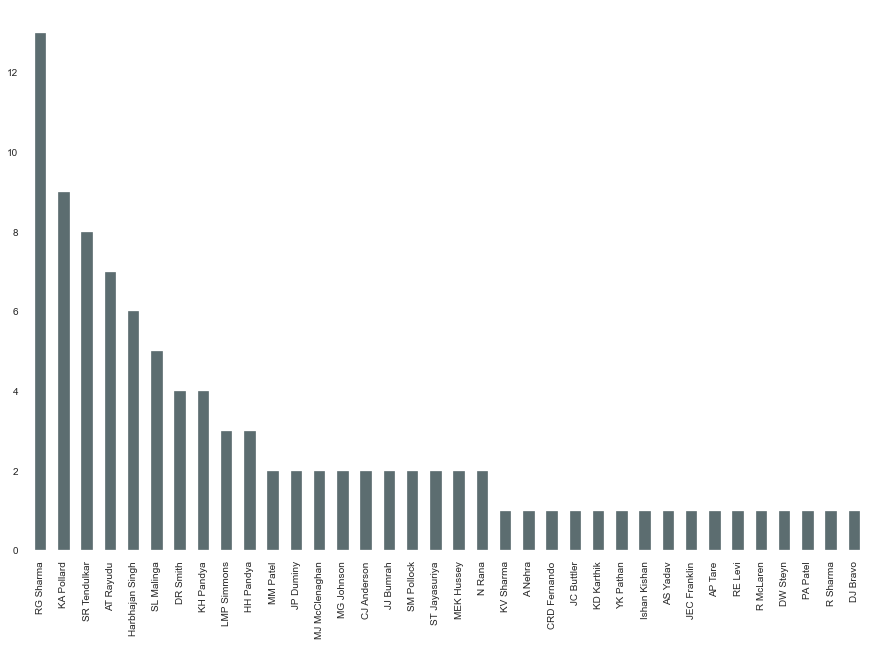

In [29]:
ipl[ipl['winner'] == 'Mumbai Indians']['player_of_match'].value_counts().plot(kind='bar',figsize=(15, 10), color='#5c6d70')